# Multivariate

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
my_data = pd.read_csv('home.csv',names=["size","bedroom","price"])

In [4]:
#we need to normalize the features using mean normalization
my_data = (my_data - my_data.mean())/my_data.std()

In [5]:
#setting the matrixes
X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

In [6]:
y = my_data.iloc[:,2:3].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

In [7]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [8]:
#set hyper parameters
alpha = 0.01
iters = 1000

In [9]:
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

[[-1.10868761e-16  8.78503652e-01 -4.69166570e-02]]


In [10]:
finalCost = computeCost(X,y,g)
print(finalCost)

0.13070336960771892


Text(0.5, 1.0, 'Error vs. Training Epoch')

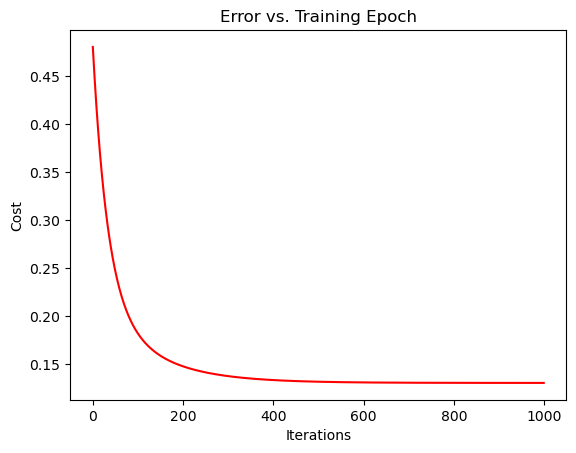

In [11]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  